# **This project is based on: "Pass the TensorFlow Developer Certification Exam by Google. Become an AI, Machine Learning, and Deep Learning expert" from Udemy**


#  We will build a deep learning model to classify food.

# It's highly recommended to use a gpu, this gpu need to be compatible with **mixed precision** (https://www.tensorflow.org/guide/mixed_precision)

In [1]:
!nvidia-smi

Wed Nov 23 22:13:05 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.82.01    Driver Version: 470.82.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla T4            Off  | 00000000:00:05.0 Off |                    0 |
| N/A   

#  It's necessary to use tensorflow 2.4.1 for better compatible with mixed precision

In [2]:
!pip install tensorflow==2.4.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.3/394.3 MB 2.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.0/462.0 kB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 62.6 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 74.2 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 54.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.1.1
    Uninstalling typing_extensions-4.1.1:
      Successfully uninstalled typing_extensions-4.1.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting

# Importing functions

In [3]:
!wget https://raw.githubusercontent.com/HugoSilvaRodrigues/FoodVision/main/functions.py


--2022-11-23 22:14:16--  https://raw.githubusercontent.com/HugoSilvaRodrigues/FoodVision/main/functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1980 (1.9K) [text/plain]
Saving to: ‘functions.py’

functions.py        100%[===================>]   1.93K  --.-KB/s    in 0s      

2022-11-23 22:14:16 (30.1 MB/s) - ‘functions.py’ saved [1980/1980]



# Import the 101 dataset direct from tensorflow_datasets

In [4]:
import tensorflow_datasets as tfds

2022-11-23 22:14:17.317474: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [5]:
datasets_list=tfds.list_builders()

2022-11-23 22:14:21.479235: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "Not found: Could not locate the credentials file.". Retrieving token from GCE failed with "Failed precondition: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Couldn't resolve host 'metadata'".


In [6]:
(train_data, test_data), ds_info= tfds.load(name="food101",
                                   split=["train", "validation"],
                                   shuffle_files=True,
                                   as_supervised=True,
                                   with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/75750 [00:00<?, ? examples/s]

Shuffling food101-train.tfrecord...:   0%|          | 0/75750 [00:00<?, ? examples/s]

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling food101-validation.tfrecord...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


2022-11-23 22:21:48.930537: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-11-23 22:21:49.136363: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-11-23 22:21:49.368169: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-23 22:21:49.380127: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2022-11-23 22:21:49.380376: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-2

# Let's see some images

In [7]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [8]:
class_names=ds_info.features["label"].names

In [9]:
train_one_sample=train_data.take(1)

In [10]:
train_one_sample

<TakeDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [11]:
for image, label in train_one_sample:
  print(f"""
  Image Shape : {image.shape}
  Image datatype {image.dtype}
  target class from food101: {label}
  class name: {class_names[label.numpy()]}
  """)

2022-11-23 22:21:54.179745: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-11-23 22:21:54.186600: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000140000 Hz



  Image Shape : (512, 512, 3)
  Image datatype <dtype: 'uint8'>
  target class from food101: 24
  class name: clam_chowder
  


In [12]:
import tensorflow as tf
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=1>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

(-0.5, 511.5, 511.5, -0.5)

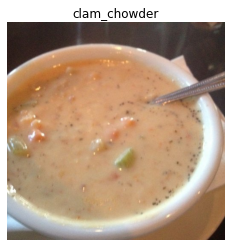

In [13]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False)

# It's necessary to preprocess the images before fit them in a deep learning model
1. Reshape the images to (224,224,3)
2. Creating batches and preparing the dataset


# 1. Reshape the images to (224,224,3)

In [14]:
def preprocess_img(image,label, img_shape=224):
  """
  Converte imagens datatype de unit8 -> float32 
  e reshape [img_shape, img_shape, 3]
  """
  image=tf.image.resize(image,[img_shape,img_shape])
  return tf.cast(image,tf.float32), label

# 2. Creating batches and preparing the datasets

In [15]:
train_data=train_data.map(map_func=preprocess_img, #Transform all of images in (224,224,3)
                          num_parallel_calls=tf.data.AUTOTUNE)#USE ALL COMPUTATION AVALIABLE

train_data=train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)#gonna shuffle 100 samples at each time, fix batch size =32 and prefetch will speed up the computation

test_data=test_data.map(map_func=preprocess_img,num_parallel_calls=tf.data.AUTOTUNE)

test_data=test_data.batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE).cache()#save some batches em memory to be faster

In [16]:
train_data,test_data

(<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>,
 <CacheDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>)

# Mixed Precision Training

Using a mixed of float32 and float16 this can improve the velocity of our model and use less memory.

In [17]:
from tensorflow.keras import mixed_precision

mixed_precision.set_global_policy("mixed_float16")# For any part of the model that it's possible to use float16 do so

2022-11-23 22:21:55.680971: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-11-23 22:21:55.681273: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-23 22:21:55.682660: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-11-23 22:21:55.682889: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [18]:
mixed_precision.global_policy()

<Policy "mixed_float16">

# Model

In [19]:
import tensorflow as tf 
from tensorflow.keras import layers

mixed_precision.set_global_policy(policy="mixed_float16")
input_shape=(224,224,3)
base_model=tf.keras.applications.EfficientNetB0(include_top=False)#Using transfer learning
base_model.trainable=False

inputs=layers.Input(shape=input_shape, name="input_layer")


x=base_model(inputs, training=False)
x=layers.GlobalAveragePooling2D()(x)
x=layers.Dense(len(class_names))(x)
outputs=layers.Activation("softmax", dtype=tf.float32, name="softmax_float_32")(x)
model=tf.keras.Model(inputs, outputs)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

16711680/16705208 [==============================] - 0s 0us/step


In [20]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 101)               129381    
_________________________________________________________________
softmax_float_32 (Activation (None, 101)               0         
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
_________________________________________________________________


In [21]:
for layer in model.layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy) #the layers with mixed_float_16 will be more effective when working with tensors

input_layer True float32 <Policy "float32">
efficientnetb0 False float32 <Policy "mixed_float16">
global_average_pooling2d True float32 <Policy "mixed_float16">
dense True float32 <Policy "mixed_float16">
softmax_float_32 True float32 <Policy "float32">


In [22]:
for layer in model.layers[1].layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_1 False float32 <Policy "float32">
rescaling False float32 <Policy "mixed_float16">
normalization False float32 <Policy "float32">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float32 <Policy "mixed_float16">
block2a_expand_bn False float32 <

# Fit the model

In [24]:
history_feature_extract=model.fit(train_data, epochs=3, steps_per_epoch=len(train_data), validation_data=test_data,validation_steps=int(0.15*len(test_data)))

Epoch 1/3
2368/2368 [==============================] - 177s 74ms/step - loss: 1.4000 - accuracy: 0.6418 - val_loss: 1.1537 - val_accuracy: 0.6970


2022-11-23 22:27:14.227758: W tensorflow/core/kernels/data/cache_dataset_ops.cc:757] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


Epoch 2/3
2368/2368 [==============================] - 176s 73ms/step - loss: 1.1979 - accuracy: 0.6900 - val_loss: 1.0998 - val_accuracy: 0.7087


2022-11-23 22:30:10.337429: W tensorflow/core/kernels/data/cache_dataset_ops.cc:757] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


Epoch 3/3
2368/2368 [==============================] - 177s 74ms/step - loss: 1.0845 - accuracy: 0.7168 - val_loss: 1.0877 - val_accuracy: 0.7060


2022-11-23 22:33:07.665994: W tensorflow/core/kernels/data/cache_dataset_ops.cc:757] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


# Conclusion
## The model had a good performance and decent loss curves, but the accuracy can be better if I unfreeze some layers and train these layers with the dataset(next steps).

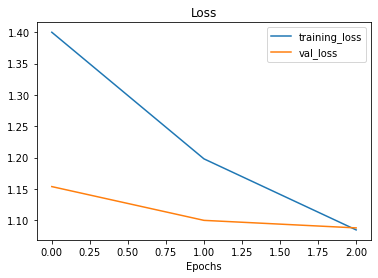

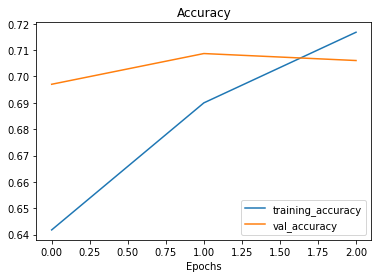

In [25]:
from functions import plot_loss_curves

plot_loss_curves(history_feature_extract)